## Regression Analysis

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
plt.rcParams['figure.figsize'] = [15,8]

In [9]:
df = pd.read_excel('AirQualityUCI.xlsx', na_values = -200)
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,NaN,NaN
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,NaN,NaN
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,NaN,NaN
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,NaN,NaN
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,NaN,NaN


In [10]:
df.shape

(9357, 17)

In [11]:
df = df.drop(['Unnamed: 15', 'Unnamed: 16'], axis =1)
df1 = df.iloc[:, 2:]

In [12]:
y = df1['T']
X = df1[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'RH', 'AH']]


In [13]:
# According to the principles of ML, we never preprocess the target
# vector

y.isnull().sum() / len(y) * 100
# 4% missing values detected



3.9115100993908305

In [15]:
target_description = y.describe()
# -200 is the placeholder for missing values

In [16]:
df1.isnull().sum() / len(df1)
df2 = df1.dropna(subset = ['T'], axis = 0)
df2.isnull().sum() / len(df2)

CO(GT)           0.183183
PT08.S1(CO)      0.000000
NMHC(GT)         0.000000
C6H6(GT)         0.000000
PT08.S2(NMHC)    0.000000
NOx(GT)          0.177400
PT08.S3(NOx)     0.000000
NO2(GT)          0.177733
PT08.S4(NO2)     0.000000
PT08.S5(O3)      0.000000
T                0.000000
RH               0.000000
AH               0.000000
dtype: float64

In [17]:
# Splitting the data into feature matrix and target vector

y = df2['T']
X = df2[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'RH', 'AH']]


In [18]:
# Splitting the data into training and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

C:\Users\azhar\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
C:\Users\azhar\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:90: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\azhar\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:89: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\azhar\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:104: RuntimeWarning: invalid value encountered in true_divide
  adj = (locs - lim1[0]) / (lim1[1] - lim1[0])


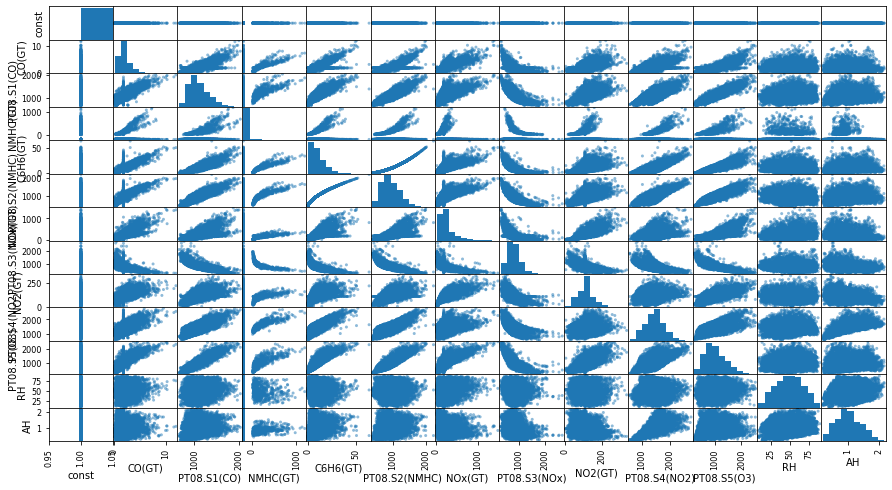

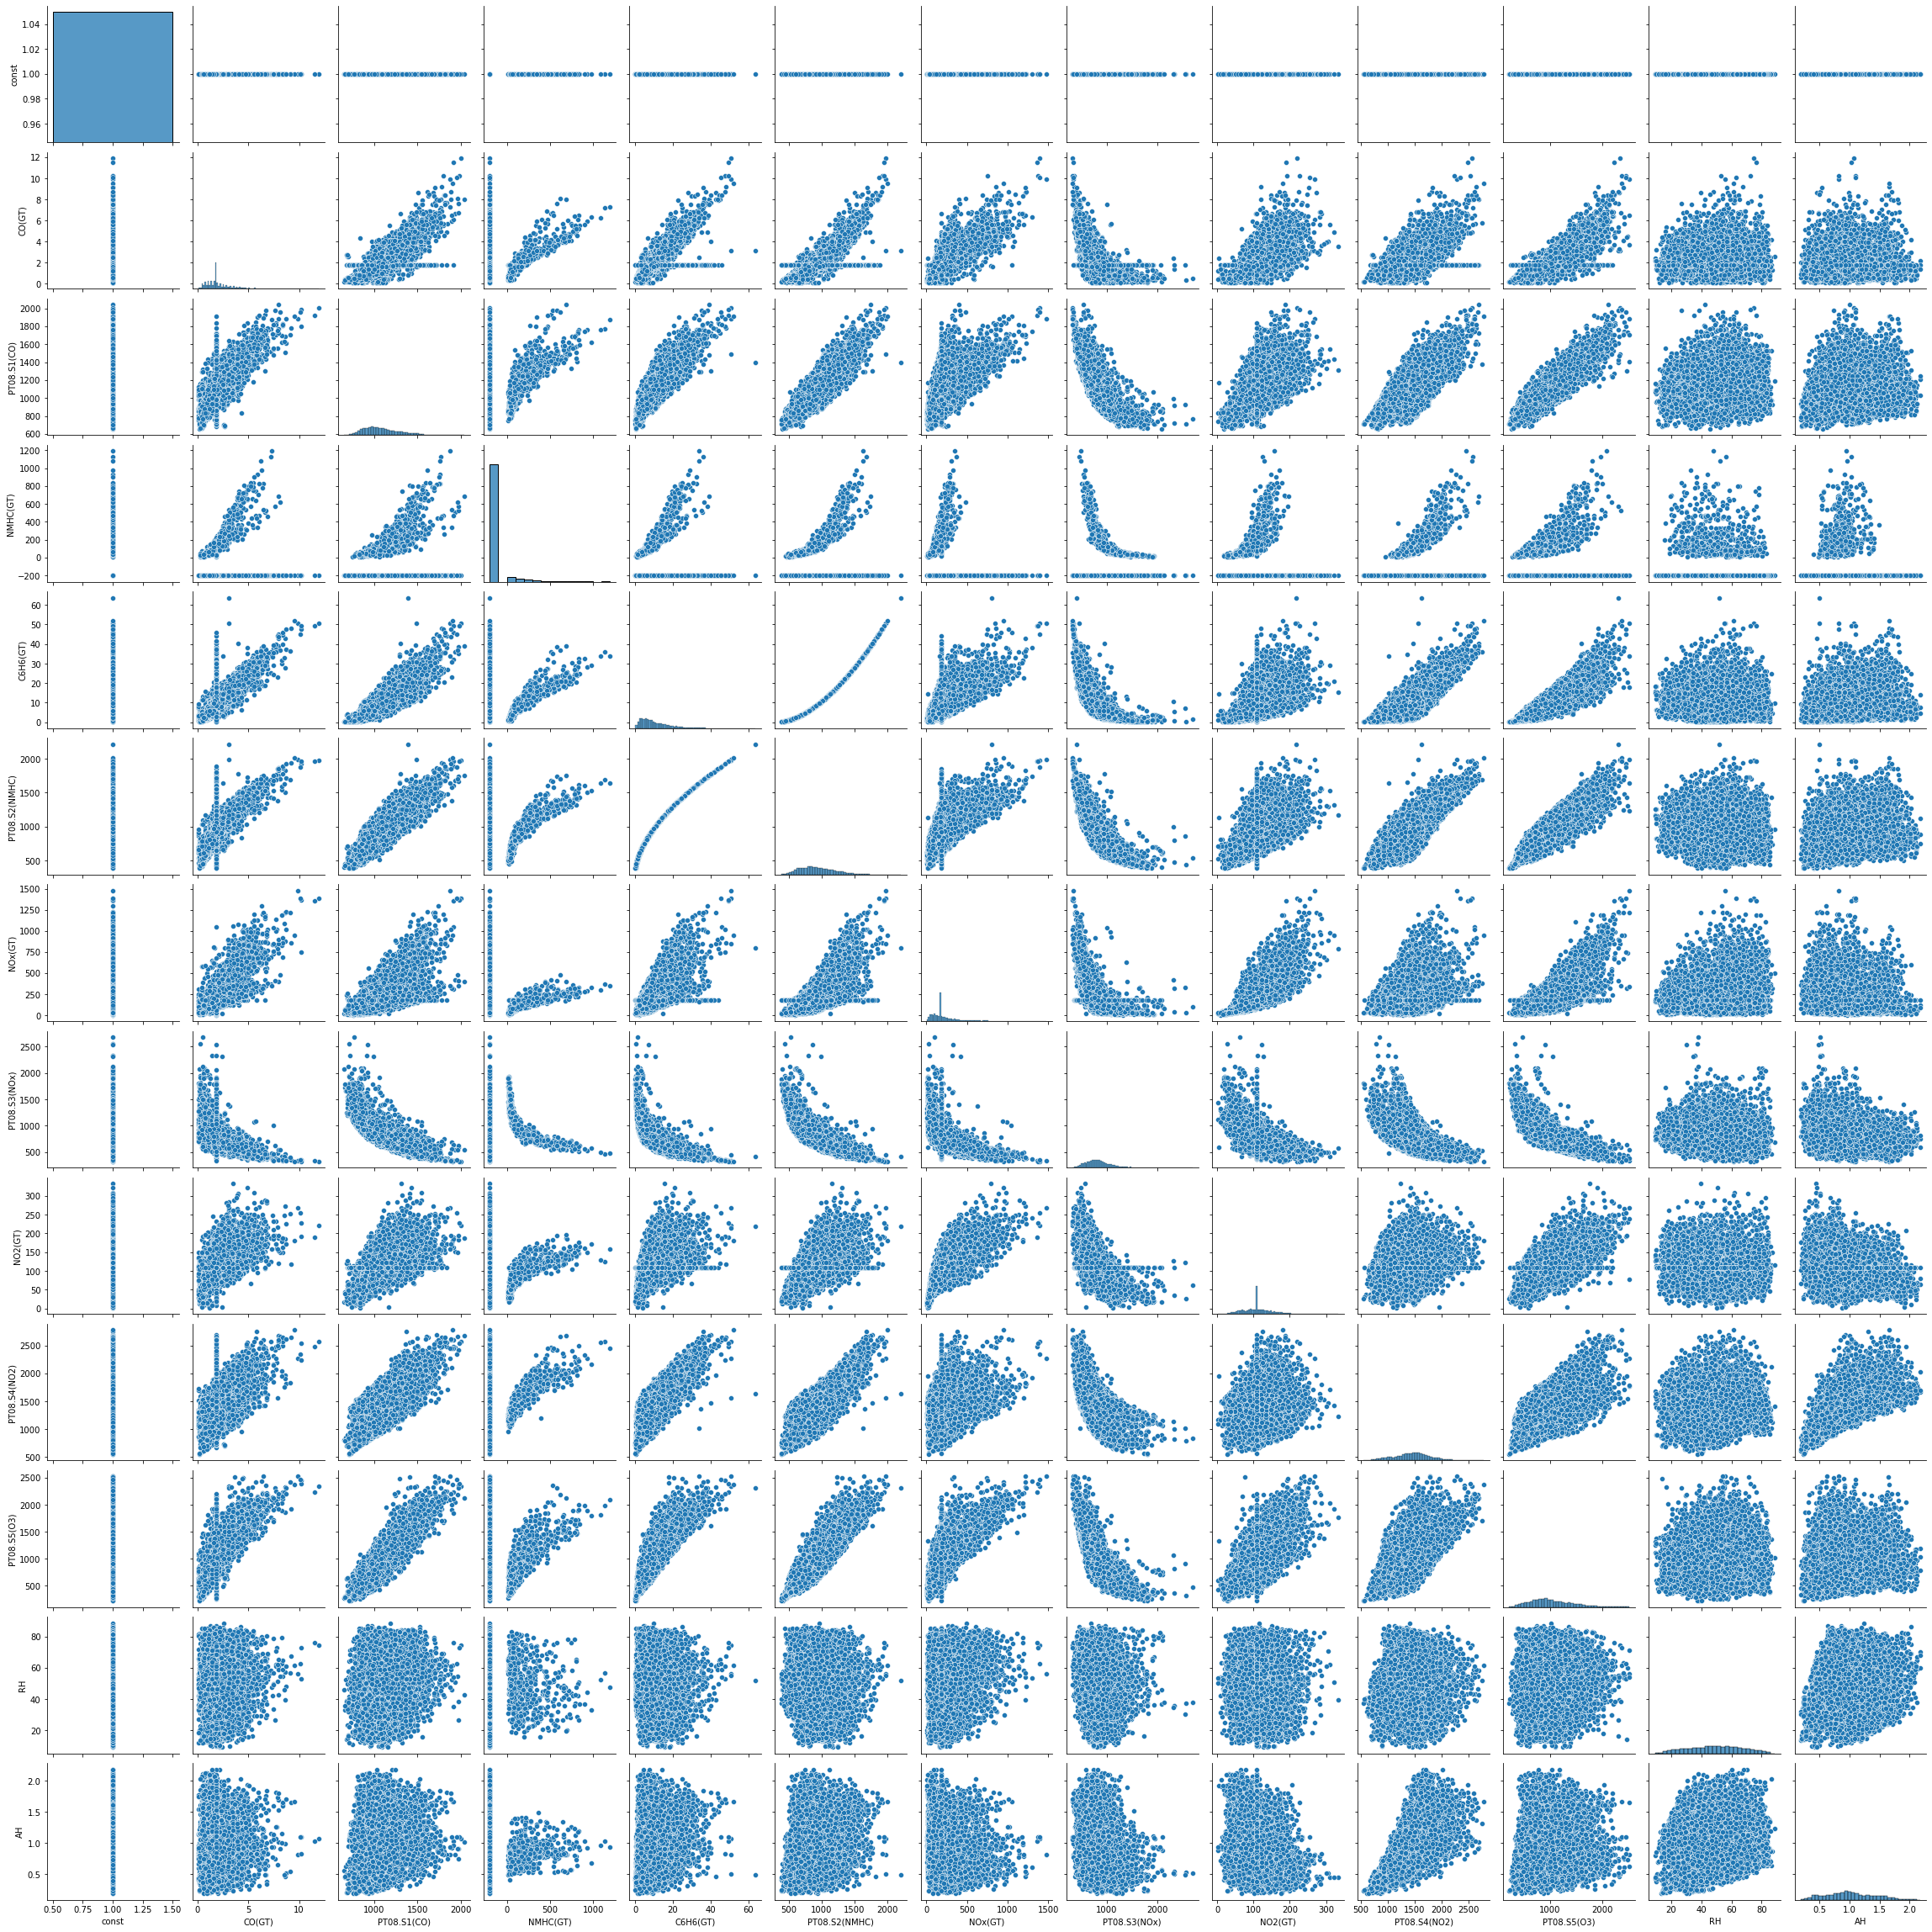

In [36]:
# Eda

pd.plotting.scatter_matrix(X_train)
sns.pairplot(X_train)

# Insight: A number of linear relationships are present

In [22]:
corr_mat = df2.corr()

# Insight: Absolute and relative humidity affect the target vector
# significantly

In [23]:

from sklearn.impute import SimpleImputer
sim = SimpleImputer(strategy = 'median')
X_train = pd.DataFrame(sim.fit_transform(X_train), columns = X_train.columns)

In [24]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train.values, X_train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     7680.
Date:                Fri, 28 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:36:39   Log-Likelihood:                -15211.
No. Observations:                6743   AIC:                         3.045e+04
Df Residuals:                    6730   BIC:                         3.054e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.0700      0.747      9.463      0.000       5.605       8.535
CO(GT)           -0.1385      0.051     -2.706      0.007      -0.239      -0.038
PT08.S1(CO)       0.0006      0.000      1.637      0.102      -0.000       0.001
NMHC(GT)         -0.0021      0.000     -7.949      0.000      -0.003      -0.002
C6H6(GT)         -0.3987      0.024    -16.629      0.000      -0.446      -0.352
PT08.S2(NMHC)     0.0103      0.001     12.266      0.000       0.009       0.012
NOx(GT)           0.0019      0.000      5.143      0.000       0.001       0.003
PT08.S3(NOx)      0.0007      0.000      2.667      0.008       0.000       0.001
NO2(GT)          -0.0008      0.001     -0.625      0.532      -0.003       0.002
PT08.S4(NO2)      0.0065      0.000     21.024      0.000       0.006       0.007
PT08.S5(O3)      -0.0027      0.000    -13.339      0.000      -0.003      -0.002
RH               -0.3373      0.002   -155.088      0.000      -0.342      -0.333
AH               13.5544      0.157     86.369      0.000      13.247      13.862
==============================================================================
Omnibus:                      802.851   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2049.262
Skew:                           0.678   Prob(JB):                         0.00
Kurtosis:                       5.335   Cond. No.                     6.66e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
# Validating the f-test for model significance
# f_statistic = MSR/MSE

y_pred = result.predict()
sse = np.sum((y_train - y_pred)**2)
sse

ssr = np.sum((y_pred - y_train.mean())**2)
ssr

msr = ssr / (X_train.shape[1] - 1)
msr

mse = sse / (len(X_train) - (X_train.shape[1] - 1))
mse

f_stat = msr/mse
f_stat

7680.943567178343

In [26]:
np.format_float_positional(1 - stats.f.cdf(f_stat, (X_train.shape[1] - 1), (len(X_train) - (X_train.shape[1] - 1))))
p_val = (1 - stats.f.cdf(f_stat, (X_train.shape[1] - 1), (len(X_train) - (X_train.shape[1] - 1))))

if p_val < 0.05:
    print("Overall Model is Significant")
else:
    print("Overall Model is not Significant")

Overall Model is Significant


In [27]:
# Applying the t-test for slope
# Identifying significant features in the model
    
t_stat = -0.1035 / 0.052
t_stat

-1.9903846153846154

In [28]:

dof = X_train.shape[0] - 2
dof

6741

In [29]:
p_value = (1 - stats.t.cdf(np.abs(t_stat), dof))*2
p_value

0.04658890040796604

In [30]:
alpha_by_2 = 0.05/2
beta_1 = -0.1035
se = 0.052

In [31]:
t_crit = np.abs(stats.t.ppf(alpha_by_2, dof))
t_crit

ci_lower = beta_1 - t_crit * se
ci_upper = beta_1 + t_crit * se

In [32]:

if p_value < 0.05:
    print("CO feature is Significant")
else:
    print("CO feature is not Significant")


CO feature is Significant


In [34]:
X_train.columns[result.pvalues < 0.05]

Index(['const', 'CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'RH', 'AH'],
      dtype='object')

In [37]:
# Validating the assumptions of regression
# 1. Linearity

from statsmodels.stats.diagnostic import linear_rainbow
lin_stat, p_val = linear_rainbow(result)
p_val

if p_val < 0.05:
    print("Reject H0 || Data is not linear")
else:
    print("Failed to reject H0 || Data is linear")

# Linearity test is passed.

Failed to reject H0 || Data is linear


In [38]:
# 2. Normality
# Shapiro Wilk and Jarque Bera

from scipy.stats import jarque_bera
normal_stat, p_val = jarque_bera(result.resid)

if p_val < 0.05:
    print("Reject H0 || Data is normal")
else:
    print("Failed to reject H0 || Data is not normal")

# Normality detected and validated

Reject H0 || Data is normal


<AxesSubplot:>

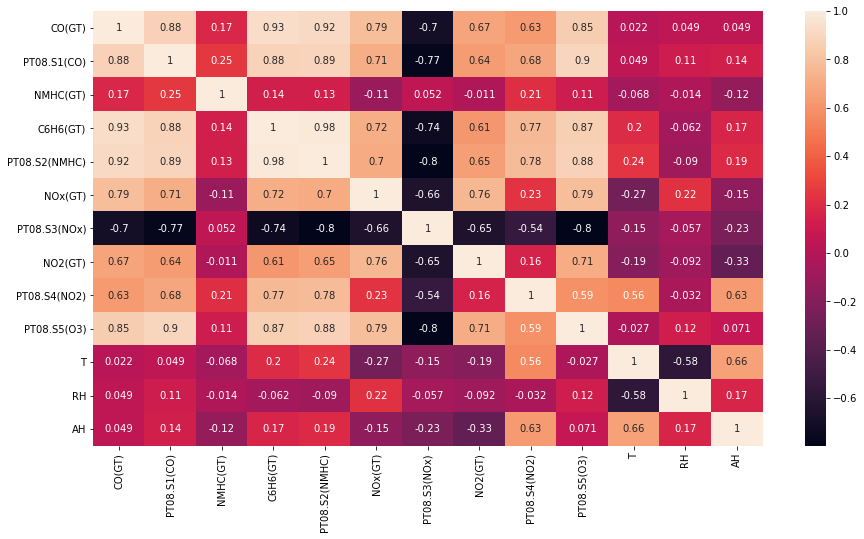

In [40]:
sns.heatmap(corr_mat, annot = True)

In [42]:
# 3. Multicollinearity
# Heatmap and VIF
    
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()    
vif['Features'] = X_train.columns

vif_score = []

for col in range(X_train.shape[1]):
    vif_score.append(variance_inflation_factor(X_train.values, col))

vif['VIF_Score'] = vif_score
    
# Severe multicollinearity detected. The features responsible
# are PT08.S2(NMHC), C6H6(GT), PT08.S4(NO2), PT08.S1(CO), PT08.S5(O3)
# and NOx(GT)
vif

,Features,VIF_Score
0,const,704.534564
1,CO(GT),5.601263
2,PT08.S1(CO),9.127670
3,NMHC(GT),1.698782
4,C6H6(GT),40.427510
5,PT08.S2(NMHC),62.944057
6,NOx(GT),6.199886
7,PT08.S3(NOx),5.757554
8,NO2(GT),3.658726
9,PT08.S4(NO2),14.384596


In [43]:
# 4. Autocorrelation
# Durbin Watson Test

from statsmodels.stats.stattools import durbin_watson
durbin_stat = durbin_watson(result.resid)
durbin_stat

# 1.98 is very close to 2
# Hence No Autocorrelation detected

1.9966241501961273

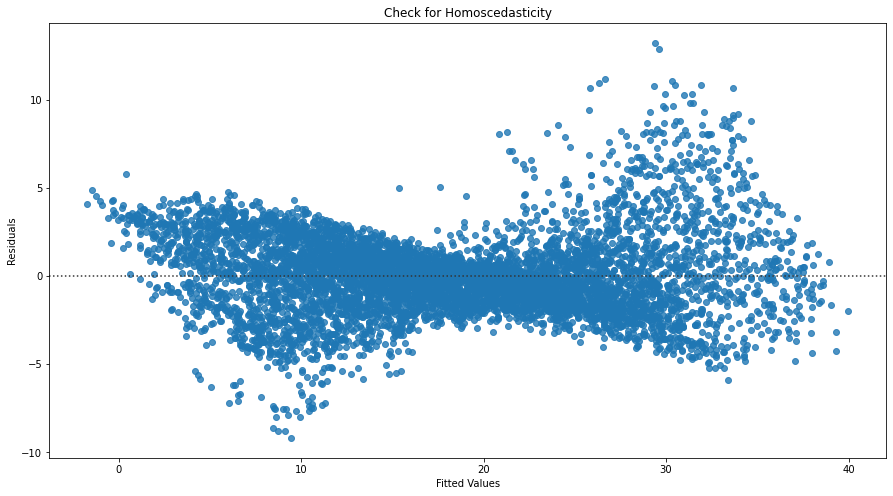

In [45]:
# 5. Homoscedasticity

sns.residplot(result.fittedvalues, result.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Check for Homoscedasticity')
plt.show()

# Hour glass pattern detected
# Heteroscedasticity detected

In [46]:
# Insight: After validating all the assumptions, we could
# conclude that the underlying dataset poses a time series
# problem with severe scope of multicollinearity.
# But if we could remove some features and drop the date
# time attribute, it could be modeled as a regression
# problem as well.

In [47]:
########## Developing the final regression model ############

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train[['NMHC(GT)',
'RH',
'NO2(GT)',
'AH',
'PT08.S3(NOx)',
'CO(GT)']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
lin_reg.score(X_train[['NMHC(GT)',
'RH',
'NO2(GT)',
'AH',
'PT08.S3(NOx)',
'CO(GT)']], y_train) # 91.9%

0.919623200691099

In [49]:
X_test = pd.DataFrame(sim.transform(X_test), columns = X_test.columns)
X_test.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
RH               0
AH               0
dtype: int64

In [50]:
lin_reg.score(X_test[['NMHC(GT)',
'RH',
'NO2(GT)',
'AH',
'PT08.S3(NOx)',
'CO(GT)']], y_test) # 92.1%

# Insight: No overfitting detected

0.9204490129705283

In [51]:
import sklearn
sklearn.__version__

'0.22.2'

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = lin_reg.predict(X_test[['NMHC(GT)',
'RH',
'NO2(GT)',
'AH',
'PT08.S3(NOx)',
'CO(GT)']])

In [53]:
print(mean_squared_error(y_test, y_pred)) # 6.05
print(mean_absolute_error(y_test, y_pred)) # 1.76
print(np.sqrt(mean_squared_error(y_test, y_pred))) # 2.46

6.122821186653359
1.7952888300888514
2.4744335082303905
